In [32]:
import nltk
import matplotlib.pyplot as plt
import numpy as np
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

In [34]:
f = open("hurriyet.txt", "r", encoding="utf-8")
txt = f.read()

t_list = txt.split("\n")
print(t_list[:10])

corpus = []
for cumle in t_list:
  corpus.append(cumle.split())

print(corpus[:10])

['iran devlet televizyonu ülkedeki eyaletin sinde yapılan reformcuları protesto amaçlı yürüyüşlere milyonlarca kişinin katıldığını bildirdi ', 'gösterilerde fitnecilere ölüm münafıklara ölüm abd ye ölüm ingiltere ye ölüm sloganları atıldı ', 'dini lider ali hamaney ve cumhurbaşkanı mahmud ahmedinejad ı destekleyen iranlılar son olaylarda yeğeni öldürülen mir hüseyin musevi başta olmak üzere muhalefet liderlerini kınadılar ', 'musevi ye ölüm ve idam idam sloganları duyuldu ', 'muhalefet liderleri kaçtı mı aşure günü yaşanan çatışmalarda devlet kaynaklarına göre u terörist olmak üzere kişi ölmüştü ', 'den fazla kişinin yaralandığı olaylar sırasında en az kişi tutuklanmıştı ', 'öte yandan iran haber ajansı irna muhalif liderler mir hüseyin musevi ve mehdi kerrubi nin başkentten kaçarak ülkenin kuzeyine geçtiğini ileri sürdü ancak muhalefet iddiayı yalanladı ', 'hamaney in bir dönem korumalığını yapan ve şu anda fransa da saklandığı söylenen bir kişinin muhalefete verdiği bilgilere göre mü

In [64]:
model = Word2Vec(corpus, vector_size=100, window=5, min_count=1, sg=1, workers=4)#model eğitimi, workers 4 çekirdek olarak sistemi hızlandırmak için ekledim
model.wv.most_similar("iran")

[('ahmedinejad', 0.781780481338501),
 ('tahran', 0.7778668403625488),
 ('programından', 0.7525987029075623),
 ('ahmedinecad', 0.75020432472229),
 ('muttaki', 0.7487972378730774),
 ('takası', 0.7441357374191284),
 ('suriye', 0.7426746487617493),
 ('körfez', 0.7226430773735046),
 ('durdurmayı', 0.7223484516143799),
 ('yaptırımlarla', 0.7156196236610413)]

In [65]:
model.wv.most_similar("perşembe")

[('pazartesi', 0.9284341931343079),
 ('çarşamba', 0.9259939789772034),
 ('salı', 0.9099474549293518),
 ('cumartesi', 0.9095953702926636),
 ('sabahı', 0.8912569284439087),
 ('akşamı', 0.887576162815094),
 ('günü', 0.8733324408531189),
 ('cuma', 0.8677852153778076),
 ('gecesi', 0.8558089733123779),
 ('pazar', 0.8450654745101929)]

In [68]:
def closestwords_tsneplot(model, kelime): #modeli görüntülemek için fonksiyon tanımlama
    word_vectors= np.empty((0,100))
    word_labels= [kelime]

    close_words = model.wv.most_similar(kelime)
    
    word_vectors = np.append(word_vectors, np.array([model.wv[kelime]]), axis=0)
    
    for w, _ in close_words:
        word_labels.append(w)
        word_vectors = np.append(word_vectors, np.array([model.wv[w]]), axis=0)
        
    perplexity_value = min(5, len(word_labels) - 1)
    tsne = TSNE(perplexity=perplexity_value, random_state=0)
    Y = tsne.fit_transform(word_vectors)
    
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    
    plt.scatter(x_coords, y_coords)
    
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(5, -2), textcoords='offset points')
        
    plt.show()

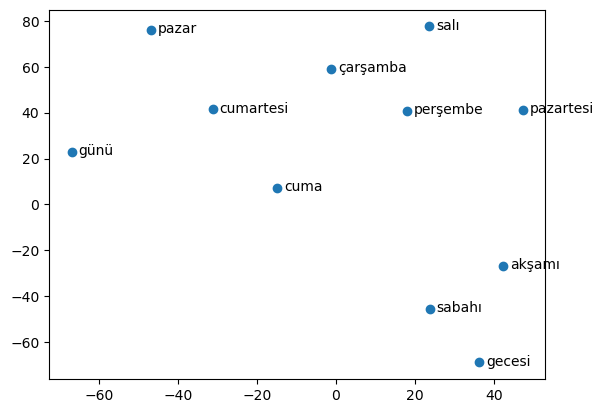

In [62]:
closestwords_tsneplot(model, "perşembe")